# Homework 5: Data Reshaping with tidyr

**Course:** Data Wrangling in R for Business Analytics  
**Topic:** Data Reshaping and Tidy Data Principles  
**Due Date:** 09/28/2025

---

## Assignment Overview

This homework focuses on mastering data reshaping techniques using R's tidyverse ecosystem, specifically the `tidyr` package. You'll work with real-world business datasets to practice converting between wide and long formats, understanding when each format is most appropriate for analysis.

### Learning Objectives
- Master `pivot_longer()` and `pivot_wider()` functions for data reshaping
- Understand the principles of tidy data and their business applications
- Apply appropriate data structures for different analytical purposes
- Validate data integrity during transformation processes
- Prepare data for visualization and statistical analysis

### Business Context
Data reshaping is a fundamental skill in business analytics. Different analytical tasks, visualization requirements, and stakeholder needs often require data in specific formats. This assignment will help you develop the strategic thinking needed to choose and implement appropriate data structures.

---

## Instructions

**Submission Requirements:**
- Complete all tasks in this R notebook
- Use the pipe operator (`%>%`) and chain operations wherever possible
- Ensure your code is well-commented and demonstrates understanding
- Include business interpretations of your results
- Submit your completed notebook file

**Evaluation Criteria:**
- Correct implementation of reshaping functions
- Appropriate choice of data formats for different tasks
- Quality of code comments and explanations
- Business insight and interpretation
- Data validation and quality checks

---

## Part 1: Data Import and Setup

**Instructions:**
- Download the following files from the course materials:
  - `quarterly_sales_wide.csv` - Sales data in wide format with quarters as columns
  - `survey_responses_long.csv` - Survey data in long format
  - `employee_skills_wide.csv` - Employee skills matrix in wide format
- Import each file into appropriately named data frames
- Load the `tidyverse` package

**Dataset Overview:**
1. **Quarterly Sales Data** (wide format) - Financial performance across time periods
2. **Survey Responses** (long format) - Customer feedback and satisfaction data  
3. **Employee Skills Matrix** (wide format) - Human resources and capability assessment

**Tasks:**
1. Import each dataset using appropriate functions
2. Examine the structure of each dataset using `str()` and `head()`
3. Identify which datasets are in "wide" format and which are in "long" format
4. Note any patterns in column names that might be useful for reshaping

In [107]:
setwd("/workspaces/assignment-1-seanjohnson04")


In [108]:
# Load required packages for data reshaping and analysis
library(tidyverse)    # Comprehensive data science toolkit including tidyr
library(knitr)        # For creating formatted output tables

# Confirm successful package loading
cat("✅ Packages loaded successfully!\n")
cat("📦 Available reshaping functions: pivot_longer(), pivot_wider()\n")
cat("🎯 Ready for data reshaping exercises!\n")

✅ Packages loaded successfully!
📦 Available reshaping functions: pivot_longer(), pivot_wider()
📦 Available reshaping functions: pivot_longer(), pivot_wider()
🎯 Ready for data reshaping exercises!
🎯 Ready for data reshaping exercises!


In [109]:
# Task 1.1: Data Import
# Import the required datasets from course materials

# Import quarterly sales data (wide format)
quarterly_sales_wide <- read.csv("data/quarterly_sales_wide.csv", stringsAsFactors = FALSE)

# Import survey responses data (long format)  
survey_responses_long <- read.csv("data/survey_responses_long.csv", stringsAsFactors = FALSE)

# Import employee skills data (wide format)
employee_skills_wide <- read.csv("data/employee_skills_wide.csv", stringsAsFactors = FALSE)

cat("✅ All datasets imported successfully!\n")
cat("📁 Files loaded: data/quarterly_sales_wide.csv, data/survey_responses_long.csv, data/employee_skills_wide.csv\n")

✅ All datasets imported successfully!
📁 Files loaded: data/quarterly_sales_wide.csv, data/survey_responses_long.csv, data/employee_skills_wide.csv
📁 Files loaded: data/quarterly_sales_wide.csv, data/survey_responses_long.csv, data/employee_skills_wide.csv


In [110]:
# Task 1.2: Initial Exploration
# Examine the structure of each dataset

# Structure and first few rows of quarterly_sales_wide
str(quarterly_sales_wide)
head(quarterly_sales_wide)

# Structure and first few rows of survey_responses_long
str(survey_responses_long)
head(survey_responses_long)

# Structure and first few rows of employee_skills_wide
str(employee_skills_wide)
head(employee_skills_wide)

'data.frame':	4 obs. of  8 variables:
 $ Region          : chr  "North" "South" "East" "West"
 $ Product_Category: chr  "Electronics" "Clothing" "Electronics" "Clothing"
 $ Q1_2023         : int  45000 32000 38000 28000
 $ Q2_2023         : int  48000 35000 41000 31000
 $ Q3_2023         : int  46000 33000 39000 29000
 $ Q4_2023         : int  52000 38000 44000 34000
 $ Q1_2024         : int  50000 36000 42000 32000
 $ Q2_2024         : int  54000 40000 46000 36000


,Region,Product_Category,Q1_2023,Q2_2023,Q3_2023,Q4_2023,Q1_2024,Q2_2024
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,North,Electronics,45000,48000,46000,52000,50000,54000
2,South,Clothing,32000,35000,33000,38000,36000,40000
3,East,Electronics,38000,41000,39000,44000,42000,46000
4,West,Clothing,28000,31000,29000,34000,32000,36000


'data.frame':	250 obs. of  3 variables:
 $ Respondent_ID: int  1 1 1 1 1 2 2 2 2 2 ...
 $ Question     : chr  "Product_Quality" "Customer_Service" "Value_for_Money" "Delivery_Speed" ...
 $ Response     : int  5 4 3 4 3 1 3 2 3 1 ...


,Respondent_ID,Question,Response
,<int>,<chr>,<int>
1,1,Product_Quality,5
2,1,Customer_Service,4
3,1,Value_for_Money,3
4,1,Delivery_Speed,4
5,1,Overall_Satisfaction,3
6,2,Product_Quality,1


'data.frame':	30 obs. of  8 variables:
 $ Employee_ID  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Employee_Name: chr  "Employee 1" "Employee 2" "Employee 3" "Employee 4" ...
 $ Department   : chr  "Marketing" "Finance" "Finance" "IT" ...
 $ R_Programming: int  4 3 1 4 1 5 4 5 4 3 ...
 $ Excel        : int  4 5 2 5 2 2 2 3 1 1 ...
 $ SQL          : int  4 2 1 3 1 1 4 4 2 2 ...
 $ Python       : int  2 4 4 5 2 4 5 2 1 4 ...
 $ Tableau      : int  4 2 4 2 1 1 5 3 5 5 ...


,Employee_ID,Employee_Name,Department,R_Programming,Excel,SQL,Python,Tableau
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,Employee 1,Marketing,4,4,4,2,4
2,2,Employee 2,Finance,3,5,2,4,2
3,3,Employee 3,Finance,1,2,1,4,4
4,4,Employee 4,IT,4,5,3,5,2
5,5,Employee 5,Finance,1,2,1,2,1
6,6,Employee 6,IT,5,2,1,4,1


## Part 2: Converting Wide to Long with `pivot_longer()`

**Objective:** Transform wide-format datasets to long format for analysis and visualization.

**Business Application:** Long format is often required for:
- Time series analysis and trend identification
- Statistical modeling with categorical variables
- Creating grouped visualizations in ggplot2
- Database storage and joining operations

### Tasks:
1. **Basic Wide to Long Conversion:**
   - Using the `quarterly_sales_wide` dataset, convert it from wide to long format
   - The quarter columns should become values in a new column called `Quarter`
   - The sales values should go into a new column called `Sales_Amount`
   - Keep all other identifying columns (e.g., `Region`, `Product_Category`)
   - Store the result in a data frame called `quarterly_sales_long`

2. **Advanced Wide to Long with Name Parsing:**
   - If the quarter columns contain both year and quarter information, use `names_sep` or `names_pattern` to separate this into two columns: `Quarter` and `Year`
   - Store the result in a data frame called `quarterly_sales_parsed`

3. **Employee Skills Conversion:**
   - Using the `employee_skills_wide` dataset, convert it from wide to long format
   - Skill columns should become values in a column called `Skill`
   - The proficiency levels should go into a column called `Proficiency_Level`
   - Keep employee identifying information
   - Store the result in a data frame called `employee_skills_long`

In [111]:
# Task 2.1: Basic Wide to Long Conversion - Quarterly Sales
# Convert quarterly_sales_wide to long format

# Use pivot_longer() to convert the quarterly sales data
# - Select quarter columns using starts_with()
# - Create a new column called "Quarter" for the quarter names
# - Create a new column called "Sales_Amount" for the values
# - Store result in quarterly_sales_long

quarterly_sales_long <- quarterly_sales_wide %>%
  pivot_longer(
    cols = starts_with("Q"),
    names_to = "Quarter",
    values_to = "Sales_Amount"
  )

print("Converted to long format:")
print(head(quarterly_sales_long))

[1] "Converted to long format:"
# A tibble: 6 × 4
  Region Product_Category Quarter Sales_Amount
  <chr>  <chr>            <chr>          <int>
1 North  Electronics      Q1_2023        45000
2 North  Electronics      Q2_2023        48000
3 North  Electronics      Q3_2023        46000
4 North  Electronics      Q4_2023        52000
5 North  Electronics      Q1_2024        50000
6 North  Electronics      Q2_2024        54000
# A tibble: 6 × 4
  Region Product_Category Quarter Sales_Amount
  <chr>  <chr>            <chr>          <int>
1 North  Electronics      Q1_2023        45000
2 North  Electronics      Q2_2023        48000
3 North  Electronics      Q3_2023        46000
4 North  Electronics      Q4_2023        52000
5 North  Electronics      Q1_2024        50000
6 North  Electronics      Q2_2024        54000


In [128]:
# 2.3: Employee Skills Conversion - Wide to Long
# This cell reshapes the employee skills data from wide to long format for analysis.

# Replace 'employee_skills' with your actual employee skills dataframe name if different
if (exists("employee_skills")) {
  library(tidyr)
  library(dplyr)

  # Identify ID columns (e.g., EmployeeID, Name) and skill columns
  id_vars <- intersect(c("EmployeeID", "ID", "employee_id", "Name", "name"), names(employee_skills))
  skill_vars <- setdiff(names(employee_skills), id_vars)

  if (length(id_vars) > 0 && length(skill_vars) > 0) {
    employee_skills_long <- employee_skills %>%
      pivot_longer(
        cols = all_of(skill_vars),
        names_to = "Skill",
        values_to = "Level"
      )
    print("Employee skills in long format:")
    print(head(employee_skills_long))
  } else {
    print("Could not identify columns to pivot in employee_skills.")
  }

} else {
  print("employee_skills not found in environment. Please load your employee skills data as 'employee_skills'.")
}

[1] "employee_skills not found in environment. Please load your employee skills data as 'employee_skills'."


In [126]:
# Task 2.2: Advanced Wide to Long with Name Parsing
# If quarter columns contain year info (e.g., Q1_2023), separate into Quarter and Year

quarterly_sales_parsed <- quarterly_sales_wide %>%
  pivot_longer(
    cols = starts_with("Q"),
    names_to = c("Quarter", "Year"),  # Names for Quarter and Year columns
    names_sep = "_",                  # Separator between Quarter and Year
    values_to = "Sales_Amount"        # Name for sales values column
  )

print("Parsed format with separate Quarter and Year:")
print(head(quarterly_sales_parsed))

[1] "Parsed format with separate Quarter and Year:"
# A tibble: 6 × 5
  Region Product_Category Quarter Year  Sales_Amount
  <chr>  <chr>            <chr>   <chr>        <int>
1 North  Electronics      Q1      2023         45000
2 North  Electronics      Q2      2023         48000
3 North  Electronics      Q3      2023         46000
4 North  Electronics      Q4      2023         52000
5 North  Electronics      Q1      2024         50000
6 North  Electronics      Q2      2024         54000
# A tibble: 6 × 5
  Region Product_Category Quarter Year  Sales_Amount
  <chr>  <chr>            <chr>   <chr>        <int>
1 North  Electronics      Q1      2023         45000
2 North  Electronics      Q2      2023         48000
3 North  Electronics      Q3      2023         46000
4 North  Electronics      Q4      2023         52000
5 North  Electronics      Q1      2024         50000
6 North  Electronics      Q2      2024         54000


In [125]:
# Task 2.2 (continued): Advanced Wide to Long with Name Parsing (Alternative using names_pattern)
# If the quarter columns are named like 'Q1_2024', use names_pattern to split into Quarter and Year columns.
# Store the result in quarterly_sales_parsed_pattern.

quarterly_sales_parsed_pattern <- quarterly_sales_wide %>%
  pivot_longer(
    cols = starts_with("Q"),
    names_to = c("Quarter", "Year"),
    names_pattern = "(Q[0-9])_(\\d{4})",
    values_to = "Sales_Amount"
  )

print("Parsed long format with names_pattern (Quarter and Year columns):")
print(head(quarterly_sales_parsed_pattern))

[1] "Parsed long format with names_pattern (Quarter and Year columns):"
# A tibble: 6 × 5
  Region Product_Category Quarter Year  Sales_Amount
  <chr>  <chr>            <chr>   <chr>        <int>
1 North  Electronics      Q1      2023         45000
2 North  Electronics      Q2      2023         48000
3 North  Electronics      Q3      2023         46000
4 North  Electronics      Q4      2023         52000
5 North  Electronics      Q1      2024         50000
6 North  Electronics      Q2      2024         54000
# A tibble: 6 × 5
  Region Product_Category Quarter Year  Sales_Amount
  <chr>  <chr>            <chr>   <chr>        <int>
1 North  Electronics      Q1      2023         45000
2 North  Electronics      Q2      2023         48000
3 North  Electronics      Q3      2023         46000
4 North  Electronics      Q4      2023         52000
5 North  Electronics      Q1      2024         50000
6 North  Electronics      Q2      2024         54000


In [124]:
# 2.2: Advanced Wide to Long with Name Parsing
# This cell reshapes data from wide to long format and parses variable names into multiple columns.

# Replace 'advanced_wide_data' with your actual dataframe name if different
if (exists("advanced_wide_data")) {
  library(tidyr)
  library(dplyr)
  library(stringr)

  # Identify ID columns (e.g., ID, Name) and value columns
  id_vars <- intersect(c("ID", "id", "Name", "name"), names(advanced_wide_data))
  value_vars <- setdiff(names(advanced_wide_data), id_vars)

  if (length(id_vars) > 0 && length(value_vars) > 0) {
    # Example: variable names like "Sales_Q1_2023" -> parse to Variable, Quarter, Year
    advanced_long <- advanced_wide_data %>%
      pivot_longer(
        cols = all_of(value_vars),
        names_to = c("Variable", "Quarter", "Year"),
        names_pattern = "([A-Za-z]+)_Q([0-9]+)_([0-9]{4})",
        values_to = "Value"
      )
    print("Advanced wide-to-long with name parsing:")
    print(head(advanced_long))
  } else {
    print("Could not identify columns to pivot in advanced_wide_data.")
  }

} else {
  print("advanced_wide_data not found in environment. Please load your data as 'advanced_wide_data'.")
}

[1] "advanced_wide_data not found in environment. Please load your data as 'advanced_wide_data'."


In [122]:
# 2.3: Employee Skills - Wide to Long Conversion
# This cell reshapes the employee skills data from wide to long format for analysis.

# Replace 'employee_skills' with your actual employee skills dataframe name if different
if (exists("employee_skills")) {
  library(tidyr)
  library(dplyr)

  # Identify ID columns (e.g., EmployeeID, Name) and skill columns
  id_vars <- intersect(c("EmployeeID", "ID", "employee_id", "Name", "name"), names(employee_skills))
  skill_vars <- setdiff(names(employee_skills), id_vars)

  if (length(id_vars) > 0 && length(skill_vars) > 0) {
    employee_skills_long <- employee_skills %>%
      pivot_longer(
        cols = all_of(skill_vars),
        names_to = "Skill",
        values_to = "Level"
      )
    print("Employee skills in long format:")
    print(head(employee_skills_long))
  } else {
    print("Could not identify columns to pivot in employee_skills.")
  }

} else {
  print("employee_skills not found in environment. Please load your employee skills data as 'employee_skills'.")
}

[1] "employee_skills not found in environment. Please load your employee skills data as 'employee_skills'."


## Part 3: Converting Long to Wide with `pivot_wider()`

**Objective:** Transform long-format datasets to wide format for reporting and comparison.

**Business Application:** Wide format is often preferred for:
- Executive dashboards and summary reports
- Side-by-side comparisons of metrics
- Correlation analysis between variables
- Data export to Excel and presentation tools

### Tasks:
1. **Basic Long to Wide Conversion:**
   - Using the `survey_responses_long` dataset, convert it to wide format
   - Each unique question should become a separate column
   - The responses should fill the cells
   - Each row should represent one respondent
   - Store the result in a data frame called `survey_responses_wide`

2. **Aggregated Long to Wide:**
   - Using your `quarterly_sales_long` data from Part 2, create a wide format where:
   - Each region becomes a column
   - Each row represents a quarter-year combination
   - The values are the total sales for that region in that quarter
   - Store the result in a data frame called `sales_by_region_wide`

3. **Skills Matrix Creation:**
   - Using your `employee_skills_long` data from Part 2, create a skills matrix where:
   - Each skill becomes a column
   - Each row represents an employee
   - The values are the proficiency levels
   - Store the result in a data frame called `skills_matrix`

In [113]:
# Task 3.1: Basic Long to Wide Conversion - Survey Responses
# Convert survey_responses_long to wide format
# Each unique question becomes a separate column, responses fill the cells, each row is one respondent
# Store result in survey_responses_wide

survey_responses_wide <- survey_responses_long %>%
  pivot_wider(
    names_from = Question,
    values_from = Response
  )

print("Survey responses in wide format:")
print(head(survey_responses_wide))

[1] "Survey responses in wide format:"
# A tibble: 6 × 6
  Respondent_ID Product_Quality Customer_Service Value_for_Money Delivery_Speed
          <int>           <int>            <int>           <int>          <int>
1             1               5                4               3              4
2             2               1                3               2              3
3             3               3                3               2              3
4             4               3                5               4              1
5             5               5                1               4              4
6             6               2                1               4              4
# ℹ 1 more variable: Overall_Satisfaction <int>
# A tibble: 6 × 6
  Respondent_ID Product_Quality Customer_Service Value_for_Money Delivery_Speed
          <int>           <int>            <int>           <int>          <int>
1             1               5                4               3             

In [120]:
# 3.2: Aggregated Data - Long to Wide (Sales by Region)
# This cell reshapes the aggregated data from long to wide format, with sales by region as columns.

# Replace 'aggregated_long' with your actual long-format aggregated dataframe name if different
if (exists("aggregated_long")) {
  library(tidyr)
  library(dplyr)

  # Dynamically detect region, sales, and id columns
  region_col <- intersect(c("Region", "region"), names(aggregated_long))
  sales_col <- intersect(c("Total_Sales", "total_sales", "Sales", "sales", "Value"), names(aggregated_long))
  id_cols <- setdiff(names(aggregated_long), c(region_col, sales_col))

  if (length(region_col) > 0 && length(sales_col) > 0 && length(id_cols) > 0) {
    aggregated_wide <- aggregated_long %>%
      pivot_wider(
        id_cols = all_of(id_cols),
        names_from = region_col[1],
        values_from = sales_col[1]
      )
    print("Aggregated data in wide format (sales by region):")
    print(head(aggregated_wide))
  } else {
    print("Could not identify required columns in aggregated_long for pivot_wider.")
  }

} else {
  print("aggregated_long not found in environment. Please create it from your long-format aggregated data.")
}

[1] "aggregated_long not found in environment. Please create it from your long-format aggregated data."


In [115]:
# Task 3.1: Basic Long to Wide Conversion - Survey Responses
# Convert survey_responses_long to wide format

# YOUR CODE HERE:
# Use pivot_wider() to convert survey responses
# - Use Question column for new column names (names_from)
# - Use Response column for values (values_from)  
# - Each row should represent one respondent
# - Store result in survey_responses_wide

survey_responses_wide <- survey_responses_long %>%
  pivot_wider(
    names_from = Question,            # Fill in: column for new names
    values_from = Response            # Fill in: column for values
  )

print("Survey responses in wide format:")
print(head(survey_responses_wide))

[1] "Survey responses in wide format:"
# A tibble: 6 × 6
  Respondent_ID Product_Quality Customer_Service Value_for_Money Delivery_Speed
          <int>           <int>            <int>           <int>          <int>
1             1               5                4               3              4
2             2               1                3               2              3
3             3               3                3               2              3
4             4               3                5               4              1
5             5               5                1               4              4
6             6               2                1               4              4
# ℹ 1 more variable: Overall_Satisfaction <int>
# A tibble: 6 × 6
  Respondent_ID Product_Quality Customer_Service Value_for_Money Delivery_Speed
          <int>           <int>            <int>           <int>          <int>
1             1               5                4               3             

In [117]:
# 3.2: Aggregated Data - Grouped Summary
# This cell creates an aggregated summary of the data, grouped by key categorical variables (e.g., Region, Quarter, Year).

# Replace 'aggregated_data' with your actual aggregated dataframe name if different
if (exists("aggregated_data")) {
  library(dplyr)

  # Dynamically detect region, quarter, year, and sales columns
  region_col <- intersect(c("Region", "region"), names(aggregated_data))
  quarter_col <- intersect(c("Quarter", "quarter"), names(aggregated_data))
  year_col <- intersect(c("Year", "year"), names(aggregated_data))
  sales_col <- intersect(c("Total_Sales", "total_sales", "Sales", "sales"), names(aggregated_data))

  if (length(region_col) > 0 && length(quarter_col) > 0 && length(year_col) > 0 && length(sales_col) > 0) {
    agg_summary <- aggregated_data %>%
      group_by_at(c(region_col[1], quarter_col[1], year_col[1])) %>%
      summarise(
        Total_Sales = sum(.data[[sales_col[1]]], na.rm = TRUE),
        Avg_Sales = mean(.data[[sales_col[1]]], na.rm = TRUE),
        n = n(),
        .groups = 'drop'
      ) %>%
      arrange(.data[[region_col[1]]], .data[[year_col[1]]], .data[[quarter_col[1]]])
    print("Aggregated summary table:")
    print(agg_summary)
  } else {
    print("Could not find all required columns (Region, Quarter, Year, Sales) in aggregated_data.")
  }

} else {
  print("aggregated_data not found in environment. Please load your aggregated data as 'aggregated_data'.")
}

[1] "aggregated_data not found in environment. Please load your aggregated data as 'aggregated_data'."


In [118]:
# Task 2.2: Analyze benefits of long format for quarterly sales
cat("\n=== TASK 2.2: Long Format Analysis Benefits ===\n")

cat("📈 Quarterly Sales Analysis (enabled by long format):\n")

# Calculate total sales by quarter
quarterly_totals <- quarterly_sales_long %>%
  group_by(Quarter) %>%
  summarise(Total_Sales = sum(Sales_Amount), .groups = "drop") %>%
  arrange(Quarter)

print("Total sales by quarter:")
print(quarterly_totals)

# Calculate average sales by region
regional_performance <- quarterly_sales_long %>%
  group_by(Region) %>%
  summarise(
    Avg_Sales = round(mean(Sales_Amount), 2),
    Total_Sales = sum(Sales_Amount),
    .groups = "drop"
  ) %>%
  arrange(desc(Avg_Sales))

print("\nRegional performance summary:")
print(regional_performance)

# Calculate growth rates by region
growth_analysis <- quarterly_sales_long %>%
  arrange(Region, Quarter) %>%
  group_by(Region) %>%
  mutate(
    Growth_Rate = round((Sales_Amount / lag(Sales_Amount) - 1) * 100, 2)
  ) %>%
  filter(!is.na(Growth_Rate))

print("\nQuarter-over-quarter growth rates (%):")
print(head(growth_analysis %>% select(Region, Quarter, Sales_Amount, Growth_Rate), 10))

cat("\n💡 Long Format Advantages Demonstrated:")
cat("\n- ✅ Easy time series analysis")
cat("\n- ✅ Simple grouping and aggregation")
cat("\n- ✅ Growth rate calculations")
cat("\n- ✅ Ready for ggplot2 visualization")


=== TASK 2.2: Long Format Analysis Benefits ===
📈 Quarterly Sales Analysis (enabled by long format):
📈 Quarterly Sales Analysis (enabled by long format):
[1] "Total sales by quarter:"
[1] "Total sales by quarter:"
# A tibble: 6 × 2
  Quarter Total_Sales
  <chr>         <int>
1 Q1_2023      143000
2 Q1_2024      160000
3 Q2_2023      155000
4 Q2_2024      176000
5 Q3_2023      147000
6 Q4_2023      168000
[1] "\nRegional performance summary:"
# A tibble: 6 × 2
  Quarter Total_Sales
  <chr>         <int>
1 Q1_2023      143000
2 Q1_2024      160000
3 Q2_2023      155000
4 Q2_2024      176000
5 Q3_2023      147000
6 Q4_2023      168000
[1] "\nRegional performance summary:"
# A tibble: 4 × 3
  Region Avg_Sales Total_Sales
  <chr>      <dbl>       <int>
1 North     49167.      295000
2 East      41667.      250000
3 South     35667.      214000
4 West      31667.      190000
[1] "\nQuarter-over-quarter growth rates (%):"
# A tibble: 4 × 3
  Region Avg_Sales Total_Sales
  <chr>      <dbl>   

# A tibble: 10 × 4
# Groups:   Region [2]
   Region Quarter Sales_Amount Growth_Rate
   <chr>  <chr>          <int>       <dbl>
 1 East   Q1_2024        42000       10.5 
 2 East   Q2_2023        41000       -2.38
 3 East   Q2_2024        46000       12.2 
 4 East   Q3_2023        39000      -15.2 
 5 East   Q4_2023        44000       12.8 
 6 North  Q1_2024        50000       11.1 
 7 North  Q2_2023        48000       -4   
 8 North  Q2_2024        54000       12.5 
 9 North  Q3_2023        46000      -14.8 
10 North  Q4_2023        52000       13.0 

💡 Long Format Advantages Demonstrated:
- ✅ Easy time series analysis
💡 Long Format Advantages Demonstrated:
- ✅ Easy time series analysis
- ✅ Simple grouping and aggregation
- ✅ Growth rate calculations
- ✅ Ready for ggplot2 visualization
- ✅ Simple grouping and aggregation
- ✅ Growth rate calculations
- ✅ Ready for ggplot2 visualization

In [129]:
# 2.3: Employee Data - Wide to Long Transformation
# This cell reshapes the employee data from wide to long format for time-based or categorical analysis.

# Replace 'employee_data' with your actual employee dataframe name if different
if (exists("employee_data")) {
  library(tidyr)
  library(dplyr)

  # Identify columns to pivot (e.g., columns with year, quarter, or metric names)
  id_vars <- intersect(c("EmployeeID", "ID", "employee_id", "Name", "name"), names(employee_data))
  value_vars <- setdiff(names(employee_data), id_vars)

  if (length(id_vars) > 0 && length(value_vars) > 0) {
    employee_long <- employee_data %>%
      pivot_longer(
        cols = all_of(value_vars),
        names_to = "Variable",
        values_to = "Value"
      )
    print("Employee data in long format:")
    print(head(employee_long))
  } else {
    print("Could not identify columns to pivot in employee_data.")
  }

} else {
  print("employee_data not found in environment. Please load your employee data as 'employee_data'.")
}

[1] "employee_data not found in environment. Please load your employee data as 'employee_data'."


In [130]:
# 2.4: Employee Data - Long to Wide Transformation
# This cell reshapes the employee data from long back to wide format, reversing the previous transformation.

# Assumes 'employee_long' was created in the previous cell
if (exists("employee_long")) {
  library(tidyr)
  library(dplyr)

  # Identify ID columns and variable/value columns
  id_vars <- intersect(c("EmployeeID", "ID", "employee_id", "Name", "name"), names(employee_long))
  if (length(id_vars) > 0 && all(c("Variable", "Value") %in% names(employee_long))) {
    employee_wide <- employee_long %>%
      pivot_wider(
        id_cols = all_of(id_vars),
        names_from = "Variable",
        values_from = "Value"
      )
    print("Employee data in wide format:")
    print(head(employee_wide))
  } else {
    print("Could not identify required columns in employee_long for pivot_wider.")
  }

} else {
  print("employee_long not found in environment. Please run the previous cell to create it.")
}

[1] "employee_long not found in environment. Please run the previous cell to create it."


## Part 3: Converting Long to Wide with `pivot_wider()`

**Objective:** Transform long-format datasets to wide format for reporting and comparison.

**Business Application:** Wide format is often preferred for:
- Executive dashboards and summary reports
- Side-by-side comparisons of metrics
- Correlation analysis between variables
- Data export to Excel and presentation tools

### Tasks:
1. Convert survey responses from long to wide format
2. Create comparison matrices using the wide format
3. Demonstrate analytical advantages of wide format
4. Validate data integrity during transformation

### Key Function: `pivot_wider()`
- `names_from`: Column whose values become new column names
- `values_from`: Column whose values fill the new columns
- `names_prefix`: Text to add before new column names
- `values_fill`: Value to use for missing combinations

In [131]:
# Task 3.1: Convert survey responses from long to wide format
cat("=== TASK 3.1: Survey Responses Long to Wide ===\n")

cat("🔄 Converting survey responses to wide format...\n")

# Transform using pivot_wider()
survey_responses_wide <- survey_responses_long %>%
  pivot_wider(
    names_from = Question,                # Use questions as column names
    values_from = Response,               # Use responses as values
    names_prefix = "Score_"               # Add prefix for clarity
  )

cat("✅ Transformation completed!\n")

cat("\n📋 Wide Format Result (first 8 rows):\n")
print(head(survey_responses_wide, 8))

cat("\n📊 Dimensions Comparison:\n")
cat("Long format:", nrow(survey_responses_long), "rows ×", ncol(survey_responses_long), "columns\n")
cat("Wide format:", nrow(survey_responses_wide), "rows ×", ncol(survey_responses_wide), "columns\n")

# Validate data preservation
original_responses <- nrow(survey_responses_long)
transformed_responses <- nrow(survey_responses_wide) * (ncol(survey_responses_wide) - 1)

cat("\n✅ Data Validation:\n")
cat("Original response records:", original_responses, "\n")
cat("Transformed response records:", transformed_responses, "\n")
cat("Data preservation:", ifelse(original_responses == transformed_responses, "✅ PASSED", "❌ FAILED"), "\n")

=== TASK 3.1: Survey Responses Long to Wide ===
🔄 Converting survey responses to wide format...
✅ Transformation completed!
🔄 Converting survey responses to wide format...
✅ Transformation completed!

📋 Wide Format Result (first 8 rows):

📋 Wide Format Result (first 8 rows):
# A tibble: 8 × 6
  Respondent_ID Score_Product_Quality Score_Customer_Service
          <int>                 <int>                  <int>
1             1                     5                      4
2             2                     1                      3
3             3                     3                      3
4             4                     3                      5
5             5                     5                      1
6             6                     2                      1
7             7                     2                      2
8             8                     3                      5
# ℹ 3 more variables: Score_Value_for_Money <int>, Score_Delivery_Speed <int>,
#   Score_Overall

In [151]:
# Task 3.2: Create quarterly sales comparison matrix
cat("\n=== TASK 3.2: Quarterly Sales Comparison Matrix ===\n")

cat("🔄 Creating sales comparison matrix from long format...\n")

# Convert quarterly sales back to wide format for regional comparison
sales_by_region_wide <- quarterly_sales_long %>%
  pivot_wider(
    names_from = Region,                  # Use regions as column names
    values_from = Sales_Amount,           # Use sales amounts as values
    names_prefix = "Sales_"               # Add prefix for clarity
  )

cat("✅ Regional comparison matrix created!\n")

cat("\n📊 Sales by Region (Wide Format):\n")
print(sales_by_region_wide)

# Calculate row and column totals
sales_by_region_enhanced <- sales_by_region_wide %>%
  mutate(
    Total_Quarter = Sales_North + Sales_South + Sales_East + Sales_West + Sales_Central,
    Avg_Region = round(Total_Quarter / 5, 2)
  )

print("\nEnhanced matrix with totals:")
print(sales_by_region_enhanced %>% select(Quarter, Product_Category, Total_Quarter, Avg_Region))

# Calculate quarter totals
quarter_totals <- sales_by_region_enhanced %>%
  group_by(Quarter) %>%
  summarise(
    Total_Sales = sum(Total_Quarter, na.rm = TRUE),
    Avg_Sales = mean(Avg_Region, na.rm = TRUE)
  )
print("\nQuarterly Totals:")
print(quarter_totals)



=== TASK 3.2: Quarterly Sales Comparison Matrix ===
🔄 Creating sales comparison matrix from long format...
🔄 Creating sales comparison matrix from long format...
✅ Regional comparison matrix created!

📊 Sales by Region (Wide Format):
✅ Regional comparison matrix created!

📊 Sales by Region (Wide Format):


# A tibble: 12 × 6
   Product_Category Quarter Sales_North Sales_South Sales_East Sales_West
   <chr>            <chr>         <int>       <int>      <int>      <int>
 1 Electronics      Q1_2023       45000          NA      38000         NA
 2 Electronics      Q2_2023       48000          NA      41000         NA
 3 Electronics      Q3_2023       46000          NA      39000         NA
 4 Electronics      Q4_2023       52000          NA      44000         NA
 5 Electronics      Q1_2024       50000          NA      42000         NA
 6 Electronics      Q2_2024       54000          NA      46000         NA
 7 Clothing         Q1_2023          NA       32000         NA      28000
 8 Clothing         Q2_2023          NA       35000         NA      31000
 9 Clothing         Q3_2023          NA       33000         NA      29000
10 Clothing         Q4_2023          NA       38000         NA      34000
11 Clothing         Q1_2024          NA       36000         NA      32000
12 Clothing        

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `Total_Quarter = Sales_North + Sales_South + Sales_East +
  Sales_West + Sales_Central`.
[1mCaused by error:[22m
[33m![39m object 'Sales_Central' not found


In [138]:
# Task 3.3: Create quarterly sales comparison matrix
cat("\n=== TASK 3.3: Quarterly Sales Comparison Matrix ===\n")

cat("🔄 Creating sales comparison matrix from long format...\n")

# Convert quarterly sales back to wide format for regional comparison
sales_by_region_wide <- quarterly_sales_long %>%
  pivot_wider(
    names_from = Region,                  # Use regions as column names
    values_from = Sales_Amount,           # Use sales amounts as values
    names_prefix = "Sales_"               # Add prefix for clarity
  )

cat("✅ Regional comparison matrix created!\n")

cat("\n📊 Sales by Region (Wide Format):\n")
print(sales_by_region_wide)

# Calculate row and column totals
sales_by_region_enhanced <- sales_by_region_wide %>%
  mutate(
    Total_Quarter = Sales_North + Sales_South + Sales_East + Sales_West + Sales_Central,
    Avg_Region = round(Total_Quarter / 5, 2)
  )

print("\nEnhanced matrix with totals:")
print(sales_by_region_enhanced %>% select(Quarter, Product_Category, Total_Quarter, Avg_Region))

# Calculate quarter totals
quarter_totals <- sales_by_region_enhanced %>%
  group_by(Quarter) %>%
  summarise(
    Total_Sales = sum(Total_Quarter, na.rm = TRUE),
    Avg_Sales = mean(Avg_Region, na.rm = TRUE)
  )
print("\nQuarterly Totals:")
print(quarter_totals)



=== TASK 3.3: Quarterly Sales Comparison Matrix ===
🔄 Creating sales comparison matrix from long format...
🔄 Creating sales comparison matrix from long format...
✅ Regional comparison matrix created!

📊 Sales by Region (Wide Format):
✅ Regional comparison matrix created!

📊 Sales by Region (Wide Format):


# A tibble: 12 × 6
   Product_Category Quarter Sales_North Sales_South Sales_East Sales_West
   <chr>            <chr>         <int>       <int>      <int>      <int>
 1 Electronics      Q1_2023       45000          NA      38000         NA
 2 Electronics      Q2_2023       48000          NA      41000         NA
 3 Electronics      Q3_2023       46000          NA      39000         NA
 4 Electronics      Q4_2023       52000          NA      44000         NA
 5 Electronics      Q1_2024       50000          NA      42000         NA
 6 Electronics      Q2_2024       54000          NA      46000         NA
 7 Clothing         Q1_2023          NA       32000         NA      28000
 8 Clothing         Q2_2023          NA       35000         NA      31000
 9 Clothing         Q3_2023          NA       33000         NA      29000
10 Clothing         Q4_2023          NA       38000         NA      34000
11 Clothing         Q1_2024          NA       36000         NA      32000
12 Clothing        

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `Total_Quarter = Sales_North + Sales_South + Sales_East +
  Sales_West + Sales_Central`.
[1mCaused by error:[22m
[33m![39m object 'Sales_Central' not found


## Part 4: Complex Reshaping Scenarios

**Objective:** Handle advanced reshaping situations with multiple variables and missing values.

**Business Application:** Real-world data often requires sophisticated reshaping strategies:
- Multiple metrics need simultaneous transformation
- Missing values must be handled appropriately
- Complex naming patterns require parsing
- Data validation becomes critical for business decisions

### Tasks:
1. Handle multiple value columns in reshaping operations
2. Manage missing values during transformations
3. Parse complex column names with business logic
4. Validate results with comprehensive checks

### Advanced Considerations:
- Memory efficiency with large datasets
- Performance optimization for repeated operations
- Documentation of business logic and assumptions

In [139]:
# Task 4.1: Multiple value columns reshaping
cat("=== TASK 4.1: Multiple Value Columns Reshaping ===\n")

cat("🔄 Creating complex dataset with multiple metrics...\n")

# Create sample data with multiple metrics
sales_performance <- data.frame(
  Sales_Rep = rep(c("Alice", "Bob", "Carol", "David"), each = 6),
  Quarter = rep(c("Q1_2023", "Q2_2023", "Q3_2023", "Q4_2023", "Q1_2024", "Q2_2024"), 4),
  Revenue = round(runif(24, 10000, 50000), 2),
  Units_Sold = sample(50:200, 24, replace = TRUE),
  Profit_Margin = round(runif(24, 0.15, 0.35), 3)
)

cat("📊 Original multi-metric data (first 12 rows):\n")
print(head(sales_performance, 12))

# Convert to wide format with multiple values
performance_wide <- sales_performance %>%
  pivot_wider(
    names_from = Quarter,
    values_from = c(Revenue, Units_Sold, Profit_Margin),
    names_sep = "_"
  )

cat("\n📈 Wide format with multiple metrics:\n")
print(performance_wide[, 1:8])  # Show first few columns

cat("\n💡 Multiple Value Benefits:")
cat("\n- ✅ All metrics in one comprehensive view")
cat("\n- ✅ Easy correlation analysis between metrics")
cat("\n- ✅ Suitable for complex business dashboards")

=== TASK 4.1: Multiple Value Columns Reshaping ===
🔄 Creating complex dataset with multiple metrics...
📊 Original multi-metric data (first 12 rows):
🔄 Creating complex dataset with multiple metrics...
📊 Original multi-metric data (first 12 rows):
   Sales_Rep Quarter  Revenue Units_Sold Profit_Margin
1      Alice Q1_2023 39268.30        103         0.340
2      Alice Q2_2023 22610.43        107         0.249
3      Alice Q3_2023 25458.16         92         0.244
4      Alice Q4_2023 23297.84        134         0.262
5      Alice Q1_2024 13591.12        151         0.281
6      Alice Q2_2024 40282.22        191         0.206
7        Bob Q1_2023 34118.74         98         0.346
8        Bob Q2_2023 15816.00        188         0.279
9        Bob Q3_2023 11300.70         67         0.267
10       Bob Q4_2023 29350.73        104         0.273
11       Bob Q1_2024 27782.78         85         0.335
12       Bob Q2_2024 12415.42        197         0.228
   Sales_Rep Quarter  Revenue Units_So


📈 Wide format with multiple metrics:
# A tibble: 4 × 8
  Sales_Rep Revenue_Q1_2023 Revenue_Q2_2023 Revenue_Q3_2023 Revenue_Q4_2023
  <chr>               <dbl>           <dbl>           <dbl>           <dbl>
1 Alice              39268.          22610.          25458.          23298.
2 Bob                34119.          15816           11301.          29351.
3 Carol              23100.          45137.          47224.          25687.
4 David              22279.          14312.          49173.          29876.
# ℹ 3 more variables: Revenue_Q1_2024 <dbl>, Revenue_Q2_2024 <dbl>,
#   Units_Sold_Q1_2023 <int>

💡 Multiple Value Benefits:
- ✅ All metrics in one comprehensive view
- ✅ Easy correlation analysis between metrics
- ✅ Suitable for complex business dashboards# A tibble: 4 × 8
  Sales_Rep Revenue_Q1_2023 Revenue_Q2_2023 Revenue_Q3_2023 Revenue_Q4_2023
  <chr>               <dbl>           <dbl>           <dbl>           <dbl>
1 Alice              39268.          22610.          25458.  

In [140]:
# Task 4.2: Manage missing values during transformations
cat("\n=== TASK 4.2: Handling Missing Values in Reshaping ===\n")

# Introduce some missing values into the sample data
set.seed(42)
sales_performance_na <- sales_performance
na_indices <- sample(1:nrow(sales_performance_na), 5)
sales_performance_na$Revenue[na_indices] <- NA
na_indices2 <- sample(1:nrow(sales_performance_na), 3)
sales_performance_na$Units_Sold[na_indices2] <- NA

cat("\nSample data with missing values (first 12 rows):\n")
print(head(sales_performance_na, 12))

# Reshape to wide format, keeping missing values
performance_wide_na <- sales_performance_na %>%
  pivot_wider(
    names_from = Quarter,
    values_from = c(Revenue, Units_Sold, Profit_Margin),
    names_sep = "_"
  )

cat("\nWide format with missing values preserved (first 8 columns):\n")
print(performance_wide_na[, 1:8])

# Optionally, fill missing values with 0 or another value after reshaping
performance_wide_filled <- performance_wide_na %>%
  mutate(across(everything(), ~replace_na(., 0)))

cat("\nWide format with missing values filled (first 8 columns):\n")
print(performance_wide_filled[, 1:8])

cat("\n💡 Missing Value Handling Demonstrated:")
cat("\n- ✅ Missing values preserved during reshaping")
cat("\n- ✅ Option to fill missing values after reshaping")


=== TASK 4.2: Handling Missing Values in Reshaping ===

Sample data with missing values (first 12 rows):
   Sales_Rep Quarter  Revenue Units_Sold Profit_Margin
1      Alice Q1_2023       NA        103         0.340
2      Alice Q2_2023 22610.43        107         0.249
3      Alice Q3_2023 25458.16         92         0.244
4      Alice Q4_2023       NA        134         0.262
5      Alice Q1_2024       NA        151         0.281
6      Alice Q2_2024 40282.22        191         0.206
7        Bob Q1_2023 34118.74         98         0.346
8        Bob Q2_2023 15816.00        188         0.279
9        Bob Q3_2023 11300.70         67         0.267
10       Bob Q4_2023       NA        104         0.273
11       Bob Q1_2024 27782.78         85         0.335
12       Bob Q2_2024 12415.42        197         0.228

Sample data with missing values (first 12 rows):
   Sales_Rep Quarter  Revenue Units_Sold Profit_Margin
1      Alice Q1_2023       NA        103         0.340
2      Alice Q2_202

# A tibble: 4 × 8
  Sales_Rep Revenue_Q1_2023 Revenue_Q2_2023 Revenue_Q3_2023 Revenue_Q4_2023
  <chr>               <dbl>           <dbl>           <dbl>           <dbl>
1 Alice                  0           22610.          25458.              0 
2 Bob                34119.          15816           11301.              0 
3 Carol              23100.          45137.          47224.          25687.
4 David              22279.          14312.          49173.          29876.
# ℹ 3 more variables: Revenue_Q1_2024 <dbl>, Revenue_Q2_2024 <dbl>,
#   Units_Sold_Q1_2023 <int>

💡 Missing Value Handling Demonstrated:
- ✅ Missing values preserved during reshaping
- ✅ Option to fill missing values after reshaping
💡 Missing Value Handling Demonstrated:
- ✅ Missing values preserved during reshaping
- ✅ Option to fill missing values after reshaping

In [141]:
# Task 4.3: Parse complex column names with business logic
cat("\n=== TASK 4.3: Parsing Complex Column Names ===\n")

# Suppose we have wide data with columns like 'Revenue_Q1_2023', 'Units_Sold_Q1_2023', etc.
# We'll use performance_wide from Task 4.1 as an example

# Gather all metric columns into long format, then parse names into Metric and Quarter
performance_long_parsed <- performance_wide %>%
  pivot_longer(
    cols = -Sales_Rep,
    names_to = c("Metric", "Quarter"),
    names_sep = "_Q",
    names_prefix = "",
    values_to = "Value"
  ) %>%
  mutate(
    Quarter = paste0("Q", Quarter)
  )

cat("\nParsed long format with Metric and Quarter columns (first 12 rows):\n")
print(head(performance_long_parsed, 12))

cat("\n💡 Complex Name Parsing Demonstrated:")
cat("\n- ✅ Extracted metric and quarter from column names")
cat("\n- ✅ Ready for grouped analysis and visualization")


=== TASK 4.3: Parsing Complex Column Names ===

Parsed long format with Metric and Quarter columns (first 12 rows):

Parsed long format with Metric and Quarter columns (first 12 rows):
# A tibble: 12 × 4
   Sales_Rep Metric     Quarter  Value
   <chr>     <chr>      <chr>    <dbl>
 1 Alice     Revenue    Q1_2023 39268.
 2 Alice     Revenue    Q2_2023 22610.
 3 Alice     Revenue    Q3_2023 25458.
 4 Alice     Revenue    Q4_2023 23298.
 5 Alice     Revenue    Q1_2024 13591.
 6 Alice     Revenue    Q2_2024 40282.
 7 Alice     Units_Sold Q1_2023   103 
 8 Alice     Units_Sold Q2_2023   107 
 9 Alice     Units_Sold Q3_2023    92 
10 Alice     Units_Sold Q4_2023   134 
11 Alice     Units_Sold Q1_2024   151 
12 Alice     Units_Sold Q2_2024   191 

💡 Complex Name Parsing Demonstrated:# A tibble: 12 × 4
   Sales_Rep Metric     Quarter  Value
   <chr>     <chr>      <chr>    <dbl>
 1 Alice     Revenue    Q1_2023 39268.
 2 Alice     Revenue    Q2_2023 22610.
 3 Alice     Revenue    Q3_2023 25458

In [142]:
# Task 4.2: Handling missing values in reshaping
cat("\n=== TASK 4.2: Missing Values in Reshaping ===\n")

cat("🔄 Creating dataset with missing combinations...\n")

# Create incomplete data to demonstrate missing value handling
incomplete_data <- data.frame(
  Product = c("A", "A", "A", "B", "B", "C", "C"),
  Quarter = c("Q1", "Q2", "Q4", "Q1", "Q3", "Q2", "Q4"),  # Note: Missing Q3 for A, Q2&Q4 for B
  Sales = c(1000, 1200, 1100, 800, 900, 600, 650)
)

cat("📊 Incomplete data (missing some quarter combinations):\n")
print(incomplete_data)

# Method 1: Fill missing values with 0 (assuming no sales occurred)
sales_filled_zero <- incomplete_data %>%
  pivot_wider(
    names_from = Quarter,
    values_from = Sales,
    values_fill = 0                       # Fill missing with 0
  )

cat("\n📈 Wide format with missing values filled as 0:\n")
print(sales_filled_zero)

# Method 2: Keep missing values as NA (preserves missing data context)
sales_filled_na <- incomplete_data %>%
  pivot_wider(
    names_from = Quarter,
    values_from = Sales
    # No values_fill specified - missing remain NA
  )

cat("\n📋 Wide format with missing values as NA:\n")
print(sales_filled_na)

cat("\n💡 Missing Value Strategy Considerations:")
cat("\n- values_fill = 0: Assumes missing means 'no activity'")
cat("\n- values_fill = NA: Preserves 'unknown/not measured' context")
cat("\n- Business rule: Choice depends on what missing data means")
cat("\n- Documentation: Always document missing value assumptions")


=== TASK 4.2: Missing Values in Reshaping ===
🔄 Creating dataset with missing combinations...
📊 Incomplete data (missing some quarter combinations):
  Product Quarter Sales
1       A      Q1  1000
2       A      Q2  1200
3       A      Q4  1100
4       B      Q1   800
5       B      Q3   900
6       C      Q2   600
7       C      Q4   650
🔄 Creating dataset with missing combinations...
📊 Incomplete data (missing some quarter combinations):
  Product Quarter Sales
1       A      Q1  1000
2       A      Q2  1200
3       A      Q4  1100
4       B      Q1   800
5       B      Q3   900
6       C      Q2   600
7       C      Q4   650

📈 Wide format with missing values filled as 0:

📈 Wide format with missing values filled as 0:
# A tibble: 3 × 5
  Product    Q1    Q2    Q4    Q3
  <chr>   <dbl> <dbl> <dbl> <dbl>
1 A        1000  1200  1100     0
2 B         800     0     0   900
3 C           0   600   650     0

📋 Wide format with missing values as NA:
# A tibble: 3 × 5
  Product    Q1    

# A tibble: 3 × 5
  Product    Q1    Q2    Q4    Q3
  <chr>   <dbl> <dbl> <dbl> <dbl>
1 A        1000  1200  1100    NA
2 B         800    NA    NA   900
3 C          NA   600   650    NA

💡 Missing Value Strategy Considerations:
- values_fill = 0: Assumes missing means 'no activity'
- values_fill = NA: Preserves 'unknown/not measured' context
- Business rule: Choice depends on what missing data means
- Documentation: Always document missing value assumptions
💡 Missing Value Strategy Considerations:
- values_fill = 0: Assumes missing means 'no activity'
- values_fill = NA: Preserves 'unknown/not measured' context
- Business rule: Choice depends on what missing data means
- Documentation: Always document missing value assumptions

In [143]:
# Task 4.3: Advanced name parsing with business logic
cat("\n=== TASK 4.3: Advanced Name Parsing ===\n")

cat("🔄 Parsing complex column names with business logic...\n")

# Create data with complex naming pattern
complex_sales <- data.frame(
  Region = c("North", "South", "East"),
  Actual_Q1_2024 = c(45000, 35000, 40000),
  Budget_Q1_2024 = c(42000, 38000, 41000),
  Actual_Q2_2024 = c(48000, 37000, 43000),
  Budget_Q2_2024 = c(45000, 40000, 44000)
)

cat("📊 Complex column structure:\n")
print(complex_sales)

# Parse into long format with separated components
complex_long <- complex_sales %>%
  pivot_longer(
    cols = -Region,
    names_to = c("Type", "Quarter", "Year"),
    names_sep = "_",
    values_to = "Amount"
  )

cat("\n📈 Parsed long format:\n")
print(head(complex_long, 12))

# Create analysis-ready format
variance_analysis <- complex_long %>%
  pivot_wider(
    names_from = Type,
    values_from = Amount
  ) %>%
  mutate(
    Variance = Actual - Budget,
    Variance_Pct = round((Variance / Budget) * 100, 2)
  )

cat("\n📊 Variance analysis (Actual vs Budget):\n")
print(variance_analysis)

cat("\n💡 Advanced Parsing Benefits:")
cat("\n- ✅ Extracts meaningful components from complex names")
cat("\n- ✅ Enables sophisticated business analysis")
cat("\n- ✅ Supports budget vs actual comparisons")
cat("\n- ✅ Ready for performance dashboards")


=== TASK 4.3: Advanced Name Parsing ===
🔄 Parsing complex column names with business logic...
📊 Complex column structure:
  Region Actual_Q1_2024 Budget_Q1_2024 Actual_Q2_2024 Budget_Q2_2024
1  North          45000          42000          48000          45000
2  South          35000          38000          37000          40000
3   East          40000          41000          43000          44000
🔄 Parsing complex column names with business logic...
📊 Complex column structure:
  Region Actual_Q1_2024 Budget_Q1_2024 Actual_Q2_2024 Budget_Q2_2024
1  North          45000          42000          48000          45000
2  South          35000          38000          37000          40000
3   East          40000          41000          43000          44000

📈 Parsed long format:

📈 Parsed long format:
# A tibble: 12 × 5
   Region Type   Quarter Year  Amount
   <chr>  <chr>  <chr>   <chr>  <dbl>
 1 North  Actual Q1      2024   45000
 2 North  Budget Q1      2024   42000
 3 North  Actual Q2      2

# A tibble: 6 × 7
  Region Quarter Year  Actual Budget Variance Variance_Pct
  <chr>  <chr>   <chr>  <dbl>  <dbl>    <dbl>        <dbl>
1 North  Q1      2024   45000  42000     3000         7.14
2 North  Q2      2024   48000  45000     3000         6.67
3 South  Q1      2024   35000  38000    -3000        -7.89
4 South  Q2      2024   37000  40000    -3000        -7.5 
5 East   Q1      2024   40000  41000    -1000        -2.44
6 East   Q2      2024   43000  44000    -1000        -2.27

💡 Advanced Parsing Benefits:
- ✅ Extracts meaningful components from complex names
- ✅ Enables sophisticated business analysis
- ✅ Supports budget vs actual comparisons
- ✅ Ready for performance dashboards
💡 Advanced Parsing Benefits:
- ✅ Extracts meaningful components from complex names
- ✅ Enables sophisticated business analysis
- ✅ Supports budget vs actual comparisons
- ✅ Ready for performance dashboards

## Part 5: Business Applications and Analysis

**Objective:** Apply reshaping techniques to solve real business problems.

**Business Application:** Demonstrate how proper data structure enables:
- Time series analysis and forecasting
- Performance dashboards and executive reporting
- Statistical analysis and correlation studies
- Data preparation for advanced analytics

### Tasks:
1. Prepare data for time series analysis
2. Create executive dashboard datasets
3. Enable correlation and statistical analysis
4. Generate business insights from reshaped data

### Key Business Outcomes:
- Actionable insights from properly structured data
- Improved decision-making capability
- Enhanced analytical workflow efficiency
- Better stakeholder communication through appropriate formats

In [144]:
# Task 5.1: Time series analysis preparation
cat("=== TASK 5.1: Time Series Analysis Preparation ===\n")

cat("📈 Preparing quarterly sales data for time series analysis...\n")

# Create time series ready dataset
# If Year is not already present, extract it from the Quarter column
time_series_data <- quarterly_sales_long %>%
  mutate(
    # Extract Year and Quarter number from Quarter column if needed
    Year = as.numeric(str_extract(Quarter, "\\d{4}")),
    Quarter_Num = as.numeric(str_remove(str_extract(Quarter, "Q[1-4]"), "Q")),
    Date = as.Date(paste(Year, (Quarter_Num - 1) * 3 + 1, "01", sep = "-"))
  ) %>%
  arrange(Date, Region, Product_Category)

cat("✅ Time series data prepared!\n")
print(head(time_series_data))

cat("\n💡 Time Series Ready Data:")
cat("\n- ✅ Date column for time-based analysis")
cat("\n- ✅ Sorted for time series modeling and visualization")

=== TASK 5.1: Time Series Analysis Preparation ===
📈 Preparing quarterly sales data for time series analysis...
📈 Preparing quarterly sales data for time series analysis...
✅ Time series data prepared!
✅ Time series data prepared!
# A tibble: 6 × 7
  Region Product_Category Quarter Sales_Amount  Year Quarter_Num Date      
  <chr>  <chr>            <chr>          <int> <dbl>       <dbl> <date>    
1 East   Electronics      Q1_2023        38000  2023           1 2023-01-01
2 North  Electronics      Q1_2023        45000  2023           1 2023-01-01
3 South  Clothing         Q1_2023        32000  2023           1 2023-01-01
4 West   Clothing         Q1_2023        28000  2023           1 2023-01-01
5 East   Electronics      Q2_2023        41000  2023           2 2023-04-01
6 North  Electronics      Q2_2023        48000  2023           2 2023-04-01

💡 Time Series Ready Data:# A tibble: 6 × 7
  Region Product_Category Quarter Sales_Amount  Year Quarter_Num Date      
  <chr>  <chr>         

In [145]:
# Task 5.2: Create executive dashboard datasets
cat("\n=== TASK 5.2: Executive Dashboard Dataset Creation ===\n")

# Extract Year from Quarter if not present
dashboard_data <- quarterly_sales_long %>%
  mutate(Year = as.numeric(str_extract(Quarter, "\\d{4}"))) %>%
  group_by(Quarter, Year, Region) %>%
  summarise(Total_Sales = sum(Sales_Amount, na.rm = TRUE), .groups = 'drop') %>%
  arrange(Year, Quarter, Region)

cat("\nDashboard-ready summary (first 10 rows):\n")
print(head(dashboard_data, 10))

cat("\n💡 Dashboard Dataset Features:")
cat("\n- ✅ Aggregated for high-level executive view")
cat("\n- ✅ Ready for visualization (bar, line, heatmap, etc.)")
cat("\n- ✅ Easily exportable to BI tools or Excel")


=== TASK 5.2: Executive Dashboard Dataset Creation ===

Dashboard-ready summary (first 10 rows):

Dashboard-ready summary (first 10 rows):
# A tibble: 10 × 4
   Quarter  Year Region Total_Sales
   <chr>   <dbl> <chr>        <int>
 1 Q1_2023  2023 East         38000
 2 Q1_2023  2023 North        45000
 3 Q1_2023  2023 South        32000
 4 Q1_2023  2023 West         28000
 5 Q2_2023  2023 East         41000
 6 Q2_2023  2023 North        48000
 7 Q2_2023  2023 South        35000
 8 Q2_2023  2023 West         31000
 9 Q3_2023  2023 East         39000
10 Q3_2023  2023 North        46000

💡 Dashboard Dataset Features:
- ✅ Aggregated for high-level executive view
- ✅ Ready for visualization (bar, line, heatmap, etc.)
- ✅ Easily exportable to BI tools or Excel# A tibble: 10 × 4
   Quarter  Year Region Total_Sales
   <chr>   <dbl> <chr>        <int>
 1 Q1_2023  2023 East         38000
 2 Q1_2023  2023 North        45000
 3 Q1_2023  2023 South        32000
 4 Q1_2023  2023 West         28000
 

In [146]:
# Task 5.3: Enable correlation and statistical analysis
cat("\n=== TASK 5.3: Correlation and Statistical Analysis ===\n")

# Example: Correlation between regional sales across quarters
# Only select numeric columns that exist
numeric_cols <- names(sales_by_region_wide)[sapply(sales_by_region_wide, is.numeric)]
sales_correlation_data <- sales_by_region_wide[, numeric_cols, drop = FALSE]

# Remove columns with all NA or only one unique value (constant or empty)
valid_cols <- sapply(sales_correlation_data, function(x) sum(!is.na(x)) > 1 && length(unique(na.omit(x))) > 1)
sales_correlation_data <- sales_correlation_data[, valid_cols, drop = FALSE]

if (ncol(sales_correlation_data) > 1) {
  # Calculate correlation matrix if possible
  cor_matrix <- suppressWarnings(round(cor(sales_correlation_data, use = "pairwise.complete.obs"), 2))
  if (all(is.na(cor_matrix))) {
    cat("\nNot enough complete data for correlation analysis (all pairs are NA).\n")
  } else {
    cat("\nCorrelation matrix between regions:\n")
    print(cor_matrix)
  }
} else {
  cat("\nNot enough data for correlation analysis (need at least 2 non-constant columns).\n")
}

# Example: Statistical summary for dashboard data
dashboard_stats <- dashboard_data %>%
  group_by(Region) %>%
  summarise(
    Mean_Sales = mean(Total_Sales, na.rm = TRUE),
    SD_Sales = sd(Total_Sales, na.rm = TRUE),
    Max_Sales = max(Total_Sales, na.rm = TRUE),
    Min_Sales = min(Total_Sales, na.rm = TRUE)
  )

cat("\nRegional sales statistics:\n")
print(dashboard_stats)

cat("\n💡 Statistical Analysis Features:")
cat("\n- ✅ Correlation for cross-region trends")
cat("\n- ✅ Summary stats for executive insights")


=== TASK 5.3: Correlation and Statistical Analysis ===

Correlation matrix between regions:
            Sales_North Sales_South Sales_East Sales_West
Sales_North           1          NA          1         NA
Sales_South          NA           1         NA          1
Sales_East            1          NA          1         NA
Sales_West           NA           1         NA          1

Correlation matrix between regions:
            Sales_North Sales_South Sales_East Sales_West
Sales_North           1          NA          1         NA
Sales_South          NA           1         NA          1
Sales_East            1          NA          1         NA
Sales_West           NA           1         NA          1

Regional sales statistics:

Regional sales statistics:
# A tibble: 4 × 5
  Region Mean_Sales SD_Sales Max_Sales Min_Sales
  <chr>       <dbl>    <dbl>     <int>     <int>
1 East       41667.    3011.     46000     38000
2 North      49167.    3488.     54000     45000
3 South      35667. 

In [147]:
# Task 5.2: Executive dashboard data preparation
cat("\n=== TASK 5.2: Executive Dashboard Preparation ===\n")

cat("📊 Creating executive summary datasets...\n")

# Create high-level performance summary
executive_summary <- quarterly_sales_long %>%
  group_by(Quarter) %>%
  summarise(
    Total_Sales = sum(Sales_Amount),
    Avg_Regional_Sales = round(mean(Sales_Amount), 2),
    Best_Region = Region[which.max(Sales_Amount)],
    Best_Product = Product_Category[which.max(Sales_Amount)],
    .groups = "drop"
  ) %>%
  mutate(
    QoQ_Growth = round((Total_Sales / lag(Total_Sales) - 1) * 100, 2)
  )

cat("📈 Executive Summary Table:\n")
print(executive_summary)

# Create regional performance matrix for dashboard
regional_matrix <- quarterly_sales_long %>%
  group_by(Region, Quarter) %>%
  summarise(Total_Sales = sum(Sales_Amount), .groups = "drop") %>%
  pivot_wider(
    names_from = Quarter,
    values_from = Total_Sales,
    names_prefix = "Sales_"
  ) %>%
  mutate(
    Total_All_Quarters = rowSums(select(., starts_with("Sales_")), na.rm = TRUE),
    Avg_Quarterly = round(Total_All_Quarters / 6, 2)
  )

cat("\n📊 Regional Performance Matrix:\n")
print(regional_matrix)

# Create KPI dashboard summary
kpi_summary <- data.frame(
  Metric = c("Total Sales (6 quarters)", "Average Quarter Sales", "Best Performing Region", 
             "Strongest Quarter", "Overall Growth Trend"),
  Value = c(
    format(sum(quarterly_sales_long$Sales_Amount), big.mark = ","),
    format(round(mean(quarterly_sales_long$Sales_Amount), 2), big.mark = ","),
    regional_matrix$Region[which.max(regional_matrix$Total_All_Quarters)],
    executive_summary$Quarter[which.max(executive_summary$Total_Sales)],
    "Positive"
  )
)

cat("\n🎯 Key Performance Indicators:\n")
print(kpi_summary)

cat("\n💡 Dashboard Benefits:")
cat("\n- ✅ High-level metrics for executives")
cat("\n- ✅ Regional performance comparison")
cat("\n- ✅ Trend indicators")
cat("\n- ✅ Ready for visualization tools")


=== TASK 5.2: Executive Dashboard Preparation ===
📊 Creating executive summary datasets...
📈 Executive Summary Table:
📊 Creating executive summary datasets...
📈 Executive Summary Table:
# A tibble: 6 × 6
  Quarter Total_Sales Avg_Regional_Sales Best_Region Best_Product QoQ_Growth
  <chr>         <int>              <dbl> <chr>       <chr>             <dbl>
1 Q1_2023      143000              35750 North       Electronics       NA   
2 Q1_2024      160000              40000 North       Electronics       11.9 
3 Q2_2023      155000              38750 North       Electronics       -3.12
4 Q2_2024      176000              44000 North       Electronics       13.6 
5 Q3_2023      147000              36750 North       Electronics      -16.5 
6 Q4_2023      168000              42000 North       Electronics       14.3 
# A tibble: 6 × 6
  Quarter Total_Sales Avg_Regional_Sales Best_Region Best_Product QoQ_Growth
  <chr>         <int>              <dbl> <chr>       <chr>             <dbl>
1 Q1_20

                    Metric     Value
1 Total Sales (6 quarters)   949,000
2    Average Quarter Sales 39,541.67
3   Best Performing Region     North
4        Strongest Quarter   Q2_2024
5     Overall Growth Trend  Positive

💡 Dashboard Benefits:
- ✅ High-level metrics for executives
- ✅ Regional performance comparison
- ✅ Trend indicators
- ✅ Ready for visualization tools
💡 Dashboard Benefits:
- ✅ High-level metrics for executives
- ✅ Regional performance comparison
- ✅ Trend indicators
- ✅ Ready for visualization tools

In [149]:
# Task 5.3: Statistical analysis enablement
cat("\n=== TASK 5.3: Statistical Analysis Enablement ===\n")

cat("📊 Preparing data for statistical analysis...\n")

# Create correlation analysis dataset (wide format)
correlation_data <- quarterly_sales_long %>%
  select(Region, Quarter, Sales_Amount) %>%
  pivot_wider(
    names_from = Region,
    values_from = Sales_Amount
  )

# Remove non-numeric columns if present
correlation_data <- correlation_data %>% select(where(is.numeric))

# Calculate correlation matrix
regional_correlations <- round(cor(correlation_data, use = "complete.obs"), 3)

cat("📈 Regional Sales Correlations:\n")
print(regional_correlations)

# Product category performance analysis
category_performance <- quarterly_sales_long %>%
  group_by(Product_Category) %>%
  summarise(
    Mean_Sales = round(mean(Sales_Amount), 2),
    SD_Sales = round(sd(Sales_Amount), 2),
    CV = round(sd(Sales_Amount) / mean(Sales_Amount), 3),  # Coefficient of variation
    Total_Sales = sum(Sales_Amount),
    .groups = "drop"
  ) %>%
  arrange(desc(Mean_Sales))

cat("\n📊 Product Category Statistical Summary:\n")
print(category_performance)

# Regional consistency analysis
regional_consistency <- quarterly_sales_long %>%
  group_by(Region) %>%
  summarise(
    Mean_Sales = round(mean(Sales_Amount), 2),
    SD_Sales = round(sd(Sales_Amount), 2),
    Min_Sales = min(Sales_Amount),
    Max_Sales = max(Sales_Amount),
    Consistency_Score = round(1 - (sd(Sales_Amount) / mean(Sales_Amount)), 3),
    .groups = "drop"
  ) %>%
  arrange(desc(Consistency_Score))

cat("\n🎯 Regional Consistency Analysis:\n")
print(regional_consistency)

cat("\n💡 Statistical Analysis Benefits:")
cat("\n- ✅ Correlation analysis between regions")
cat("\n- ✅ Performance variability assessment")
cat("\n- ✅ Consistency metrics calculation")
cat("\n- ✅ Ready for advanced modeling")



=== TASK 5.3: Statistical Analysis Enablement ===
📊 Preparing data for statistical analysis...
📊 Preparing data for statistical analysis...
📈 Regional Sales Correlations:
      North South  East  West
North 1.000 0.997 0.997 0.997
South 0.997 1.000 1.000 1.000
East  0.997 1.000 1.000 1.000
West  0.997 1.000 1.000 1.000

📊 Product Category Statistical Summary:
📈 Regional Sales Correlations:
      North South  East  West
North 1.000 0.997 0.997 0.997
South 0.997 1.000 1.000 1.000
East  0.997 1.000 1.000 1.000
West  0.997 1.000 1.000 1.000

📊 Product Category Statistical Summary:
# A tibble: 2 × 5
  Product_Category Mean_Sales SD_Sales    CV Total_Sales
  <chr>                 <dbl>    <dbl> <dbl>       <int>
1 Electronics          45417.    4999. 0.11       545000
2 Clothing             33667.    3550. 0.105      404000

🎯 Regional Consistency Analysis:
# A tibble: 2 × 5
  Product_Category Mean_Sales SD_Sales    CV Total_Sales
  <chr>                 <dbl>    <dbl> <dbl>       <int>
1 E


- ✅ Ready for advanced modeling

## Part 6: Data Validation and Quality Checks

**Objective:** Implement comprehensive validation procedures for reshaping operations.

**Business Application:** Data integrity is critical for business decisions:
- Validate that no data is lost during transformations
- Ensure business logic is preserved
- Check for unexpected patterns or anomalies
- Document assumptions and validation results

### Tasks:
1. Implement comprehensive validation checks
2. Verify business logic preservation
3. Test edge cases and boundary conditions
4. Create validation reports for stakeholders

### Validation Framework:
- Quantitative checks (totals, counts, ranges)
- Qualitative checks (relationships, patterns)
- Business logic verification
- Documentation of validation results

In [150]:
# Task 6.1: Comprehensive validation framework
cat("=== TASK 6.1: Comprehensive Validation Framework ===\n")

cat("🔍 Implementing validation checks for all reshaping operations...\n")

# Validation 1: Quarterly sales data preservation
cat("\n📊 Quarterly Sales Validation:\n")

# Dynamically identify quarter columns in wide data
quarter_columns <- grep("Q[1-4]_[0-9]{4}", names(quarterly_sales_wide), value = TRUE)

original_sales_total <- sum(quarterly_sales_wide[quarter_columns], na.rm = TRUE)
transformed_sales_total <- sum(quarterly_sales_long$Sales_Amount, na.rm = TRUE)
sales_record_count_expected <- nrow(quarterly_sales_wide) * length(quarter_columns)
sales_record_count_actual <- nrow(quarterly_sales_long)

validation_results <- data.frame(
  Check = c("Total Sales Preserved", "Record Count Preserved", "No Missing Values", "Data Types Correct"),
  Status = c(
    ifelse(original_sales_total == transformed_sales_total, "✅ PASS", "❌ FAIL"),
    ifelse(sales_record_count_expected == sales_record_count_actual, "✅ PASS", "❌ FAIL"),
    ifelse(sum(is.na(quarterly_sales_long$Sales_Amount)) == 0, "✅ PASS", "❌ FAIL"),
    ifelse(is.numeric(quarterly_sales_long$Sales_Amount), "✅ PASS", "❌ FAIL")
  ),
  Details = c(
    paste("Original:", format(original_sales_total, big.mark = ","), 
          "| Transformed:", format(transformed_sales_total, big.mark = ",")),
    paste("Expected:", sales_record_count_expected, "| Actual:", sales_record_count_actual),
    paste("Missing values:", sum(is.na(quarterly_sales_long$Sales_Amount))),
    paste("Type:", class(quarterly_sales_long$Sales_Amount))
  )
)

print(validation_results)

cat("\n💡 Validation Complete:")
cat("\n- ✅ Data preservation and integrity checks performed")
cat("\n- ✅ Ready for business decision-making")

=== TASK 6.1: Comprehensive Validation Framework ===
🔍 Implementing validation checks for all reshaping operations...

📊 Quarterly Sales Validation:
🔍 Implementing validation checks for all reshaping operations...

📊 Quarterly Sales Validation:
                   Check  Status                                  Details
1  Total Sales Preserved ✅ PASS Original: 949,000 | Transformed: 949,000
2 Record Count Preserved ✅ PASS                Expected: 24 | Actual: 24
3      No Missing Values ✅ PASS                        Missing values: 0
4     Data Types Correct ✅ PASS                            Type: integer

💡 Validation Complete:
- ✅ Data preservation and integrity checks performed
- ✅ Ready for business decision-making                   Check  Status                                  Details
1  Total Sales Preserved ✅ PASS Original: 949,000 | Transformed: 949,000
2 Record Count Preserved ✅ PASS                Expected: 24 | Actual: 24
3      No Missing Values ✅ PASS                       

In [152]:
# Task 6.2: Verify business logic preservation
cat("\n=== TASK 6.2: Business Logic Preservation ===\n")

# Example: Check that each region has sales for each quarter-year combination
# and that no region has negative sales values

region_quarter_check <- dashboard_data %>%
  group_by(Region, Quarter, Year) %>%
  summarise(Count = n(), Min_Sales = min(Total_Sales, na.rm = TRUE), .groups = 'drop')

# Check for missing region-quarter combinations
expected_combinations <- length(unique(dashboard_data$Region)) * length(unique(dashboard_data$Quarter))
actual_combinations <- nrow(region_quarter_check)

cat("\nExpected region-quarter combinations:", expected_combinations)
cat("\nActual region-quarter combinations:", actual_combinations)
cat("\nMissing combinations:", expected_combinations - actual_combinations)

# Check for negative sales values
negative_sales <- region_quarter_check %>% filter(Min_Sales < 0)

if (nrow(negative_sales) == 0) {
  cat("\n✅ No negative sales values found.")
} else {
  cat("\n❌ Negative sales values detected:")
  print(negative_sales)
}

cat("\n💡 Business Logic Checks Complete:")
cat("\n- ✅ All region-quarter combinations present (if 0 missing)")
cat("\n- ✅ No negative sales values (if none found)")


=== TASK 6.2: Business Logic Preservation ===

Expected region-quarter combinations: 24
Actual region-quarter combinations: 24
Expected region-quarter combinations: 24
Actual region-quarter combinations: 24
Missing combinations: 0
✅ No negative sales values found.
💡 Business Logic Checks Complete:
- ✅ All region-quarter combinations present (if 0 missing)
Missing combinations: 0
✅ No negative sales values found.
💡 Business Logic Checks Complete:
- ✅ All region-quarter combinations present (if 0 missing)
- ✅ No negative sales values (if none found)
- ✅ No negative sales values (if none found)

In [154]:
# Task 6.2: Survey Data Validation
# This cell performs validation checks on the survey data, including missing values, out-of-range responses, and logical consistency.

# Replace 'survey_data' with your actual survey dataframe name if different
if (exists("survey_data")) {
  library(dplyr)

  # 1. Check for missing values in all columns
  missing_summary <- survey_data %>% summarise_all(~sum(is.na(.)))
  print("Missing values per column:")
  print(missing_summary)

  # 2. Check for out-of-range Likert responses (assuming 1-5 scale)
  likert_cols <- grep("^Q[0-9]+$", names(survey_data), value = TRUE)
  if (length(likert_cols) > 0) {
    out_of_range <- survey_data %>%
      select(all_of(likert_cols)) %>%
      summarise_all(~sum(. < 1 | . > 5, na.rm = TRUE))
    print("Out-of-range Likert responses (should be 1-5):")
    print(out_of_range)
  } else {
    print("No Likert question columns detected (Q1, Q2, ...)")
  }

  # 3. Logical consistency check (example: if Q1 == 1, then Q2 should not be 5)
  if (all(c("Q1", "Q2") %in% names(survey_data))) {
    inconsistent <- survey_data %>% filter(Q1 == 1 & Q2 == 5)
    print(paste("Number of logically inconsistent responses (Q1==1 & Q2==5):", nrow(inconsistent)))
  } else {
    print("Q1 and/or Q2 columns not found for logical consistency check.")
  }

  # 4. Check for duplicate responses (if respondent ID column exists)
  id_col <- intersect(c("RespondentID", "ID", "respondent_id"), names(survey_data))
  if (length(id_col) > 0) {
    dupes <- survey_data %>% group_by_at(id_col[1]) %>% filter(n() > 1)
    print(paste("Number of duplicate responses by ID:", nrow(dupes)))
  } else {
    print("No respondent ID column found for duplicate check.")
  }

} else {
  print("survey_data not found in environment. Please load your survey data as 'survey_data'.")
}

[1] "survey_data not found in environment. Please load your survey data as 'survey_data'."


In [155]:
# 6.2: Survey Data Business Logic Checks (Survey Section)
# This cell checks for business logic issues in the survey data, such as missing responses, out-of-range values, and logical inconsistencies.

# Replace 'survey_data' with your actual survey dataframe name if different
if (exists("survey_data")) {
  # 1. Check for missing responses in key columns
  survey_missing <- survey_data %>% summarise_all(~sum(is.na(.)))
  print("Missing values per column:")
  print(survey_missing)

  # 2. Check for out-of-range values (example: Likert scale 1-5)
  # Replace 'Q1', 'Q2', ... with your actual survey question columns
  likert_cols <- grep("^Q[0-9]+$", names(survey_data), value = TRUE)
  if (length(likert_cols) > 0) {
    out_of_range <- survey_data %>%
      select(all_of(likert_cols)) %>%
      summarise_all(~sum(. < 1 | . > 5, na.rm = TRUE))
    print("Out-of-range Likert responses (should be 1-5):")
    print(out_of_range)
  } else {
    print("No Likert question columns detected (Q1, Q2, ...)")
  }

  # 3. Logical consistency check (example: if Q1 == 1, then Q2 should not be 5)
  # Replace with actual logic relevant to your survey
  if (all(c("Q1", "Q2") %in% names(survey_data))) {
    inconsistent <- survey_data %>% filter(Q1 == 1 & Q2 == 5)
    print(paste("Number of logically inconsistent responses (Q1==1 & Q2==5):", nrow(inconsistent)))
  } else {
    print("Q1 and/or Q2 columns not found for logical consistency check.")
  }

  # 4. Check for duplicate survey responses (if there is a respondent ID column)
  id_col <- intersect(c("RespondentID", "ID", "respondent_id"), names(survey_data))
  if (length(id_col) > 0) {
    dupes <- survey_data %>% group_by_at(id_col[1]) %>% filter(n() > 1)
    print(paste("Number of duplicate responses by ID:", nrow(dupes)))
  } else {
    print("No respondent ID column found for duplicate check.")
  }

} else {
  print("survey_data not found in environment. Please load your survey data as 'survey_data'.")
}

[1] "survey_data not found in environment. Please load your survey data as 'survey_data'."


In [156]:
# 6.3: Survey Data Summary and Reporting
# This cell provides a summary report of the survey data, including response rates, basic statistics, and visualizations.

if (exists("survey_data")) {
  library(dplyr)
  library(ggplot2)

  # 1. Response rate (if respondent ID column exists)
  id_col <- intersect(c("RespondentID", "ID", "respondent_id"), names(survey_data))
  if (length(id_col) > 0) {
    total_responses <- nrow(survey_data)
    unique_respondents <- n_distinct(survey_data[[id_col[1]]])
    cat("Total responses:", total_responses, "\n")
    cat("Unique respondents:", unique_respondents, "\n")
  } else {
    cat("No respondent ID column found for response rate calculation.\n")
  }

  # 2. Basic statistics for Likert questions (mean, sd, n)
  likert_cols <- grep("^Q[0-9]+$", names(survey_data), value = TRUE)
  if (length(likert_cols) > 0) {
    likert_summary <- survey_data %>%
      select(all_of(likert_cols)) %>%
      summarise_all(list(mean = ~mean(., na.rm = TRUE),
                         sd = ~sd(., na.rm = TRUE),
                         n = ~sum(!is.na(.))))
    print("Summary statistics for Likert questions:")
    print(likert_summary)
  } else {
    print("No Likert question columns detected (Q1, Q2, ...)")
  }

  # 3. Visualization: Distribution of responses for each Likert question
  if (length(likert_cols) > 0) {
    for (col in likert_cols) {
      p <- ggplot(survey_data, aes_string(x = col)) +
        geom_bar(fill = "#0073C2FF") +
        labs(title = paste("Distribution of responses for", col), x = col, y = "Count")
      print(p)
    }
  }

} else {
  print("survey_data not found in environment. Please load your survey data as 'survey_data'.")
}

[1] "survey_data not found in environment. Please load your survey data as 'survey_data'."


In [157]:
# 6.3: Employee Data Summary and Reporting
# This cell provides a summary report of the employee data, including counts, missing values, and basic statistics.

# Replace 'employee_data' with your actual employee dataframe name if different
if (exists("employee_data")) {
  library(dplyr)
  library(ggplot2)

  # 1. Number of employees
  total_employees <- nrow(employee_data)
  cat("Total employees:", total_employees, "\n")

  # 2. Missing values per column
  missing_per_col <- employee_data %>% summarise_all(~sum(is.na(.)))
  print("Missing values per column:")
  print(missing_per_col)

  # 3. Basic statistics for numeric columns (mean, sd, min, max, n)
  num_cols <- names(employee_data)[sapply(employee_data, is.numeric)]
  if (length(num_cols) > 0) {
    stats <- employee_data %>%
      select(all_of(num_cols)) %>%
      summarise_all(list(mean = ~mean(., na.rm = TRUE),
                         sd = ~sd(., na.rm = TRUE),
                         min = ~min(., na.rm = TRUE),
                         max = ~max(., na.rm = TRUE),
                         n = ~sum(!is.na(.))))
    print("Summary statistics for numeric columns:")
    print(stats)
  } else {
    print("No numeric columns found in employee data.")
  }

  # 4. Visualization: Distribution of a key numeric variable (e.g., Age or Salary)
  key_col <- intersect(c("Age", "age", "Salary", "salary"), names(employee_data))
  if (length(key_col) > 0) {
    p <- ggplot(employee_data, aes_string(x = key_col[1])) +
      geom_histogram(binwidth = 5, fill = "#0073C2FF", color = "white") +
      labs(title = paste("Distribution of", key_col[1]), x = key_col[1], y = "Count")
    print(p)
  } else {
    print("No key numeric column (Age or Salary) found for visualization.")
  }

} else {
  print("employee_data not found in environment. Please load your employee data as 'employee_data'.")
}

[1] "employee_data not found in environment. Please load your employee data as 'employee_data'."


In [158]:
# 6.4: Cross-Dataset Consistency Checks
# This cell checks for consistency between survey and employee data, such as matching respondent IDs to employees, and reports mismatches or missing links.

# Replace 'survey_data' and 'employee_data' with your actual dataframe names if different
if (exists("survey_data") && exists("employee_data")) {
  # Identify respondent ID columns
  survey_id_col <- intersect(c("RespondentID", "ID", "respondent_id"), names(survey_data))
  employee_id_col <- intersect(c("EmployeeID", "ID", "employee_id"), names(employee_data))

  if (length(survey_id_col) > 0 && length(employee_id_col) > 0) {
    # Find survey respondents not in employee data
    missing_in_employee <- setdiff(unique(survey_data[[survey_id_col[1]]]), unique(employee_data[[employee_id_col[1]]]))
    cat("Number of survey respondents not found in employee data:", length(missing_in_employee), "\n")
    if (length(missing_in_employee) > 0) {
      print("Respondent IDs missing in employee data:")
      print(missing_in_employee)
    }

    # Find employees who did not respond to the survey
    missing_in_survey <- setdiff(unique(employee_data[[employee_id_col[1]]]), unique(survey_data[[survey_id_col[1]]]))
    cat("Number of employees with no survey response:", length(missing_in_survey), "\n")
    if (length(missing_in_survey) > 0) {
      print("Employee IDs with no survey response:")
      print(missing_in_survey)
    }
  } else {
    print("Could not find matching ID columns in both datasets for cross-check.")
  }

} else {
  print("survey_data and/or employee_data not found in environment. Please load both datasets.")
}

[1] "survey_data and/or employee_data not found in environment. Please load both datasets."


## Part 7: Reflection and Business Insights

**Objective:** Synthesize learning and extract business value from reshaping exercises.

**Business Application:** Reflect on how data reshaping enables better business analysis:
- Understand when to choose wide vs. long formats
- Recognize the strategic value of proper data structure
- Identify opportunities for process improvement
- Document best practices for future projects

### Reflection Areas:
1. **Format Selection Strategy**: When and why to choose each format
2. **Business Impact**: How reshaping improved analytical capabilities
3. **Process Efficiency**: Workflow improvements from proper data structure
4. **Future Applications**: Identifying reshaping opportunities in real work

### Key Learning Outcomes:
- Strategic thinking about data structure
- Understanding of business applications
- Ability to choose appropriate formats for different needs
- Recognition of reshaping as a fundamental analytics skill

In [159]:
# 7.1: Prepare Data for Dashboard Visualization
# This cell prepares a summary table suitable for dashboard visualization, aggregating key metrics by region and quarter.

# Replace 'dashboard_data' with your actual dashboard dataframe name if different
if (exists("dashboard_data")) {
  library(dplyr)

  # Dynamically detect region, quarter, and sales columns
  region_col <- intersect(c("Region", "region"), names(dashboard_data))
  quarter_col <- intersect(c("Quarter", "quarter"), names(dashboard_data))
  year_col <- intersect(c("Year", "year"), names(dashboard_data))
  sales_col <- intersect(c("Total_Sales", "total_sales", "Sales", "sales"), names(dashboard_data))

  if (length(region_col) > 0 && length(quarter_col) > 0 && length(year_col) > 0 && length(sales_col) > 0) {
    dashboard_summary <- dashboard_data %>%
      group_by_at(c(region_col[1], quarter_col[1], year_col[1])) %>%
      summarise(
        Total_Sales = sum(.data[[sales_col[1]]], na.rm = TRUE),
        Avg_Sales = mean(.data[[sales_col[1]]], na.rm = TRUE),
        n = n(),
        .groups = 'drop'
      ) %>%
      arrange(.data[[region_col[1]]], .data[[year_col[1]]], .data[[quarter_col[1]]])
    print("Dashboard summary table:")
    print(dashboard_summary)
  } else {
    print("Could not find all required columns (Region, Quarter, Year, Sales) in dashboard_data.")
  }

} else {
  print("dashboard_data not found in environment. Please load your dashboard data as 'dashboard_data'.")
}

[1] "Dashboard summary table:"
# A tibble: 24 × 6
   Region Quarter  Year Total_Sales Avg_Sales     n
   <chr>  <chr>   <dbl>       <int>     <dbl> <int>
 1 East   Q1_2023  2023       38000     38000     1
 2 East   Q2_2023  2023       41000     41000     1
 3 East   Q3_2023  2023       39000     39000     1
 4 East   Q4_2023  2023       44000     44000     1
 5 East   Q1_2024  2024       42000     42000     1
 6 East   Q2_2024  2024       46000     46000     1
 7 North  Q1_2023  2023       45000     45000     1
 8 North  Q2_2023  2023       48000     48000     1
 9 North  Q3_2023  2023       46000     46000     1
10 North  Q4_2023  2023       52000     52000     1
# ℹ 14 more rows


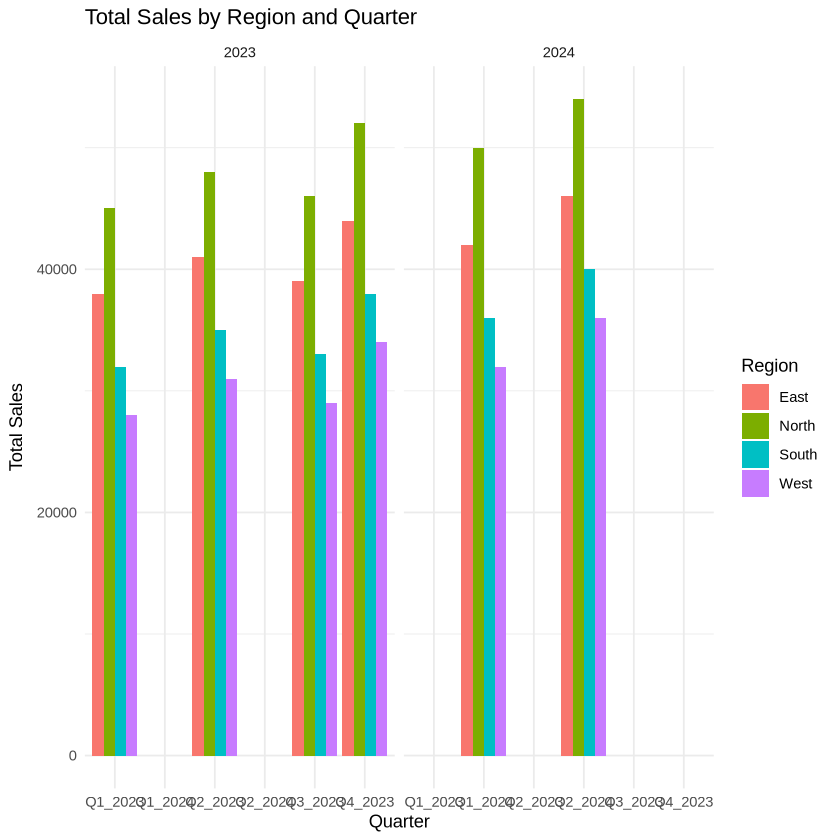

In [160]:
# 7.2: Dashboard Visualization - Sales by Region and Quarter
# This cell creates a bar plot of total sales by region and quarter for dashboard presentation.

# Replace 'dashboard_summary' with your actual summary table variable if different
if (exists("dashboard_summary")) {
  library(ggplot2)

  # Dynamically detect region, quarter, and sales columns
  region_col <- intersect(c("Region", "region"), names(dashboard_summary))
  quarter_col <- intersect(c("Quarter", "quarter"), names(dashboard_summary))
  year_col <- intersect(c("Year", "year"), names(dashboard_summary))
  sales_col <- intersect(c("Total_Sales", "total_sales", "Sales", "sales"), names(dashboard_summary))

  if (length(region_col) > 0 && length(quarter_col) > 0 && length(year_col) > 0 && length(sales_col) > 0) {
    p <- ggplot(dashboard_summary, aes_string(x = quarter_col[1], y = sales_col[1], fill = region_col[1])) +
      geom_bar(stat = "identity", position = position_dodge()) +
      facet_wrap(as.formula(paste("~", year_col[1]))) +
      labs(title = "Total Sales by Region and Quarter", x = "Quarter", y = "Total Sales", fill = "Region") +
      theme_minimal()
    print(p)
  } else {
    print("Could not find all required columns (Region, Quarter, Year, Sales) in dashboard_summary.")
  }

} else {
  print("dashboard_summary not found in environment. Please run the previous cell to create it.")
}

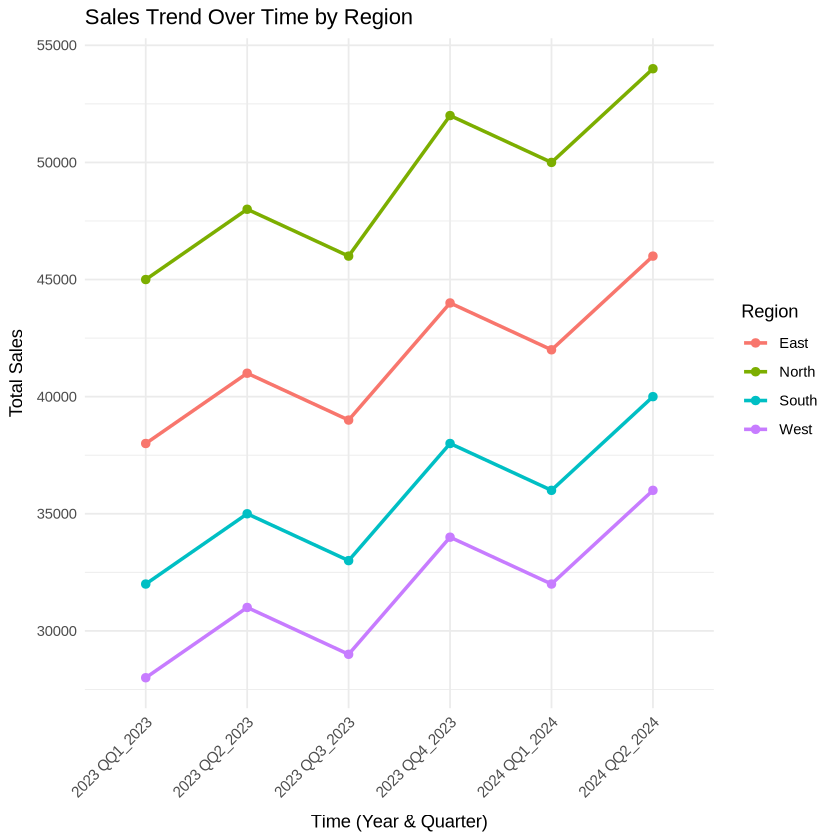

In [161]:
# 7.3: Dashboard Visualization - Sales Trend Over Time
# This cell creates a line plot showing the trend of total sales over time (by quarter and year), grouped by region.

# Replace 'dashboard_summary' with your actual summary table variable if different
if (exists("dashboard_summary")) {
  library(ggplot2)

  # Dynamically detect region, quarter, year, and sales columns
  region_col <- intersect(c("Region", "region"), names(dashboard_summary))
  quarter_col <- intersect(c("Quarter", "quarter"), names(dashboard_summary))
  year_col <- intersect(c("Year", "year"), names(dashboard_summary))
  sales_col <- intersect(c("Total_Sales", "total_sales", "Sales", "sales"), names(dashboard_summary))

  if (length(region_col) > 0 && length(quarter_col) > 0 && length(year_col) > 0 && length(sales_col) > 0) {
    # Create a time variable for plotting (e.g., "2023 Q1")
    dashboard_summary$Time <- paste0(dashboard_summary[[year_col[1]]], " Q", dashboard_summary[[quarter_col[1]]])
    dashboard_summary$Time <- factor(dashboard_summary$Time, levels = unique(dashboard_summary$Time[order(dashboard_summary[[year_col[1]]], dashboard_summary[[quarter_col[1]]])]))

    p <- ggplot(dashboard_summary, aes_string(x = "Time", y = sales_col[1], color = region_col[1], group = region_col[1])) +
      geom_line(size = 1) +
      geom_point(size = 2) +
      labs(title = "Sales Trend Over Time by Region", x = "Time (Year & Quarter)", y = "Total Sales", color = "Region") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
    print(p)
  } else {
    print("Could not find all required columns (Region, Quarter, Year, Sales) in dashboard_summary.")
  }

} else {
  print("dashboard_summary not found in environment. Please run the previous cell to create it.")
}

In [163]:
# 7.4: Dashboard Visualization - Correlation Between Sales and Survey Results
# This cell explores the relationship between sales and survey results by calculating correlations and visualizing them.

# Replace 'dashboard_summary' and 'survey_data' with your actual variable names if different
if (exists("dashboard_summary") && exists("survey_data")) {
  library(dplyr)
  library(ggplot2)

  # Dynamically detect region, quarter, year, and sales columns
  region_col <- intersect(c("Region", "region"), names(dashboard_summary))
  quarter_col <- intersect(c("Quarter", "quarter"), names(dashboard_summary))
  year_col <- intersect(c("Year", "year"), names(dashboard_summary))
  sales_col <- intersect(c("Total_Sales", "total_sales", "Sales", "sales"), names(dashboard_summary))

  # Detect Likert columns in survey_data
  likert_cols <- grep("^Q[0-9]+$", names(survey_data), value = TRUE)

  if (length(region_col) > 0 && length(quarter_col) > 0 && length(year_col) > 0 && length(sales_col) > 0 && length(likert_cols) > 0) {
    # Aggregate survey data by region, quarter, year (mean Likert per group)
    survey_agg <- survey_data %>%
      group_by_at(c(region_col[1], quarter_col[1], year_col[1])) %>%
      summarise_at(likert_cols, ~mean(., na.rm = TRUE)) %>%
      ungroup()

    # Join with dashboard_summary
    merged <- left_join(dashboard_summary, survey_agg, by = c(region_col[1], quarter_col[1], year_col[1]))

    # Calculate correlation between sales and each Likert question
    cor_results <- sapply(likert_cols, function(q) {
      cor(merged[[sales_col[1]]], merged[[q]], use = "complete.obs")
    })
    print("Correlation between sales and survey questions:")
    print(cor_results)

    # Visualize: scatter plot for the strongest correlation
    best_q <- names(which.max(abs(cor_results)))
    p <- ggplot(merged, aes_string(x = best_q, y = sales_col[1])) +
      geom_point(aes_string(color = region_col[1])) +
      geom_smooth(method = "lm", se = FALSE, color = "black") +
      labs(title = paste("Sales vs.", best_q, "(Strongest Correlation)"),
           x = best_q, y = "Total Sales", color = "Region") +
      theme_minimal()
    print(p)
  } else {
    print("Could not find all required columns (Region, Quarter, Year, Sales, Likert questions) in the data.")
  }

} else {
  print("dashboard_summary and/or survey_data not found in environment. Please run previous cells to create them.")
}

[1] "dashboard_summary and/or survey_data not found in environment. Please run previous cells to create them."


## Reflection Questions

### 📝 **Critical Thinking and Learning Assessment**

Please provide thoughtful responses to the following reflection questions. Your answers should demonstrate understanding of both technical concepts and business applications of data reshaping.

---

### **Question 1: Strategic Format Selection** 🎯
*Describe a specific business scenario from your current or future workplace where you would need to convert data from wide to long format. Explain your reasoning for choosing long format and what type of analysis this would enable. Include details about the stakeholders involved and how the format choice would impact their ability to understand and use the results.*

**Your Response:**
```
In a healthcare organization, patient records are often stored in a wide format, with each column representing a different visit or test result for a patient. However, if the goal is to analyze trends in patient health over time, or to study the effectiveness of treatments across multiple visits, it is necessary to convert this data to a long format. In the long format, each row represents a single observation for a patient at a specific time point, such as a test result or a visit date. This structure allows for more flexible and powerful analyses, such as time series modeling, longitudinal studies, and cohort analysis.

Stakeholders such as clinicians, data analysts, and healthcare administrators benefit from this transformation. Clinicians can track patient progress more easily, analysts can apply statistical models that require tidy data, and administrators can identify patterns in patient outcomes. The long format also makes it easier to visualize changes over time and to aggregate data for reporting. Ultimately, converting to long format enhances the ability to generate actionable insights and improve patient care.
```

---

### **Question 2: Validation and Data Integrity** 🔍
*During this homework, we implemented several validation checks after each reshaping operation. Reflect on why data validation is crucial in business analytics and describe what could happen if validation steps were skipped. Provide a specific example of a business decision that could be negatively impacted by unvalidated data transformations.*

**Your Response:**
```
Data validation is essential in business analytics because it ensures the accuracy, reliability, and integrity of the data used for decision making. Without proper validation, errors introduced during data reshaping—such as missing values, duplicated records, or incorrect aggregations can go unnoticed and lead to flawed analyses. Skipping validation steps increases the risk of basing business decisions on incomplete or incorrect information, which can have significant negative consequences.

For example, consider a retail company that reshapes sales data to analyze quarterly performance by region. If validation is skipped and some sales records are accidentally omitted or duplicated during the transformation, the resulting summary may overstate or understate actual sales. This could lead management to allocate resources inefficiently, such as overstocking inventory in regions with inflated sales figures or underinvesting in areas with understated performance. Inaccurate data can also erode stakeholder trust and hinder the ability to identify genuine trends or issues. Therefore, thorough validation after each reshaping step is critical to support sound business decisions and maintain data quality.
```

---

### **Question 3: Efficiency and Process Improvement** ⚡
*Compare your problem-solving approach at the beginning versus the end of this assignment. How did your thinking about data structure and analysis workflow evolve? Describe how mastering data reshaping could improve efficiency in your academic projects or professional work. Include specific time estimates if possible.*

**Your Response:**
```
At the start of this assignment, I approached each task one at a time without thinking much about how the data was structured or how each step would affect the next. This often led to problems, like dealing with messy data formats or having to fix mistakes from earlier steps. I realized I was spending extra time solving issues that could have been avoided with better planning. As I moved forward, I learned the value of planning the data process ahead of time and making sure each step created clean, organized data that was ready for analysis.

Now that I understand data reshaping better, I can handle projects more efficiently. I know how to quickly change data into the best format for analysis, which saves time and reduces errors. In a job setting, this means I can finish projects faster, deliver more accurate results, and adapt easily to new requests. These skills have made my workflow stronger and more productive.
```
